## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(f"Data Shape: {mouse_metadata.shape}")
mouse_metadata.head(10)


Data Shape: (249, 5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


In [2]:
print(f"Data Shape: {study_results.shape}")
study_results.head(10)

Data Shape: (1893, 4)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [3]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview

print(f"Data Shape: {combined_data.shape}")
combined_data.head(10)

Data Shape: (1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
print(f"There are {mice_count} mice in this study")

There are 249 mice in this study


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combined_data[combined_data["Mouse ID"] == "g989"]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_data.set_index("Mouse ID")
cleaned_df = cleaned_df.drop("g989")
cleaned_df = cleaned_df.reset_index()
cleaned_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(cleaned_df["Mouse ID"].unique())
print(f"Mice count after cleaning data: {mice_count2}")

Mice count after cleaning data: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
regimen_median = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
regimen_variance = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
regimen_std = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
regimen_sem = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stats = pd.DataFrame({"Tumor Volume Average (mm3)": round(regimen_mean,2), "Tumor Volume Median (mm3)": round(regimen_median, 2), 
                             "Tumor Volume Variance": round(regimen_variance,2) ,"Tumor Volume St Dev": round(regimen_std,2), 
                             "Tumor Volume SEM": round(regimen_sem,4)})
summary_stats

,Tumor Volume Average (mm3),Tumor Volume Median (mm3),Tumor Volume Variance,Tumor Volume St Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.3293
Ceftamin,52.59,51.78,39.29,6.27,0.4698
Infubinol,52.88,51.82,43.13,6.57,0.4922
Ketapril,55.24,53.70,68.55,8.28,0.6039
Naftisol,54.33,52.51,66.17,8.13,0.5965
Placebo,54.03,52.29,61.17,7.82,0.5813
Propriva,52.32,50.45,43.85,6.62,0.5443
Ramicane,40.22,40.67,23.49,4.85,0.3210
Stelasyn,54.23,52.43,59.45,7.71,0.5731


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# This method produces everything in a single groupby function


## Bar and Pie Charts

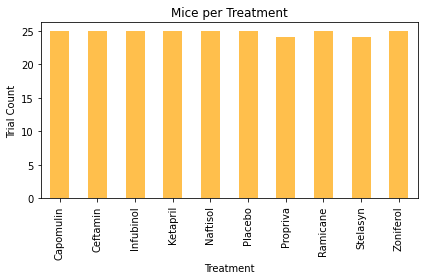

In [90]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

grouped_regimen = cleaned_df.groupby("Drug Regimen")

grouped_regimen = grouped_regimen["Mouse ID"].nunique()


grouped_regimen.plot(kind="bar", color="orange", alpha= 0.7)
plt.title("Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Trial Count")
plt.tight_layout()





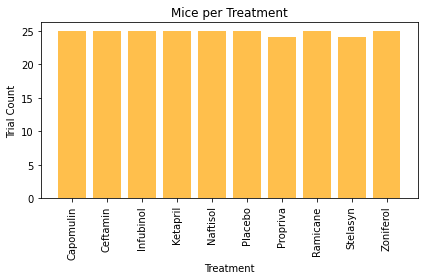

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = grouped_regimen.index
y_axis = grouped_regimen

x_array = np.arange(len(x_axis))
plt.bar(x_axis, y_axis, color="orange",alpha=0.7, align="center")
plt.xticks(rotation = 90)
plt.xlabel("Treatment")
plt.ylabel("Trial Count")
plt.title("Mice per Treatment")
plt.tight_layout()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002588BC34CA0>],
      dtype=object)

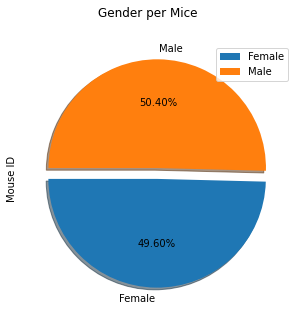

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped_gender = cleaned_df.groupby('Sex')
gender_series = grouped_gender['Mouse ID'].nunique()

gender_series = pd.DataFrame(gender_series)

gender_series.plot(kind="pie", figsize=(10,5), title="Gender per Mice", shadow=True, autopct= "%1.2f%%",startangle=180, subplots=True, explode=[0,.1])

Text(0.5, 1.0, 'Gender per Mice')

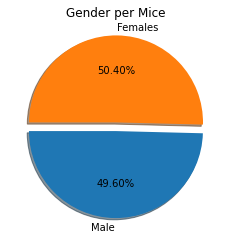

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_series["Mouse ID"], autopct = "%1.2f%%", startangle=180, explode=[0,0.1], shadow=True,labels=["Male","Females"])
plt.title("Gender per Mice")

## Quartiles, Outliers and Boxplots

In [150]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = cleaned_df.groupby("Mouse ID")
maxtime_df = pd.DataFrame(max_timepoint["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtime_df= pd.merge(cleaned_df, maxtime_df, how="right", on=["Mouse ID", "Timepoint"])
# maxtime_df

top_regimen = maxtime_df.loc[(maxtime_df["Drug Regimen"] == "Capomulin") | (maxtime_df["Drug Regimen"] == "Ramicane") | ((maxtime_df["Drug Regimen"] == "Infubinol")) | ((maxtime_df["Drug Regimen"] == "Ceftamin"))]
top_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
